In [96]:
t,m,c,e, E0, R = var("t,m,c,e,E0,R")

r = function("r",latex_name = r"r")(t)
phi = function("phi",latex_name = r"\phi")(t)
r_dot = function("r_dot", latex_name = r"\dot{r}")(t)
phi_dot = function("phi_dot", latex_name = r"\dot{\phi}")(t)

In [97]:
L = -m*c^2 * sqrt(1 - (r*phi_dot)^2/c^2) + e*E0*(r*cos(phi)*sin(r*phi_dot*t/R))

In [98]:
# r axis
r_var = var("r_var")
L_r = L.subs({r: r_var})
dL_dr = diff(L_r, r_var).subs({r_var:r})

Force_r = -dL_dr
Force_r = Force_r.subs({r:R})

lam_r = var("lam_r", latex_name = r"\lambda_r")
pretty_print(lam_r == Force_r)

lam_r == -E0*e*t*cos(t*phi_dot(t))*cos(phi(t))*phi_dot(t) - E0*e*cos(phi(t))*sin(t*phi_dot(t)) - R*m*phi_dot(t)^2/sqrt(-R^2*phi_dot(t)^2/c^2 + 1)

In [101]:
# phi axis
phi_var = var("phi_var")
phi_dot_var = var("phi_dot_var")

L_phi = L.subs({phi: phi_var, phi_dot: phi_dot_var})
dL_dphi = diff(L_phi, phi_var).subs({phi_var: phi, phi_dot_var: phi_dot})
dL_dphi_dot = diff(L_phi, phi_dot_var).subs({phi_var: phi, phi_dot_var: phi_dot})

euler_largrange = dL_dphi - diff(dL_dphi_dot, t) == 0

phi_ddot = var("phi_ddot", latex_name = r"\ddot{\phi}")
euler_largrange = euler_largrange.subs({diff(phi_dot,t):phi_ddot, diff(phi,t): phi_dot, r: R, diff(r,t):0})

solution = solve(euler_largrange, phi_ddot)
solution = solution

In [102]:
pretty_print(simplify(solution))

[phi_ddot == -(((-R^2*phi_dot(t)^2/c^2 + 1)^(3/2)*E0*e*t*phi_dot(t)*sin(phi(t)) - (-R^2*phi_dot(t)^2/c^2 + 1)^(3/2)*E0*e*cos(phi(t)))*cos(t*phi_dot(t)) + ((-R^2*phi_dot(t)^2/c^2 + 1)^(3/2)*E0*e*t*cos(phi(t))*phi_dot(t) - (-R^2*phi_dot(t)^2/c^2 + 1)^(3/2)*E0*e*sin(phi(t)))*sin(t*phi_dot(t)))/((-R^2*phi_dot(t)^2/c^2 + 1)^(3/2)*E0*e*t^2*cos(phi(t))*sin(t*phi_dot(t)) - R*m)]

# 1 pendulum

In [134]:
t,m,e,c,l,g = var("t,m,e,c,l,g")
E0 = var("E0", latex_name = r"E_0")
B0 = var("B0", latex_name = r"B_0")
omega = var("omega", latex_name = r"\omega")

r = function("r")(t)
theta = function("theta")(t)
phi = function("phi")(t)

r_dot = function("r_dot", latex_name = r"\dot{r}")(t)
theta_dot = function("theta_dot", latex_name = r"\dot{\theta}")(t)
phi_dot = function("phi_dot", latex_name = r"\dot{\phi}")(t)

In [166]:
electric_potential = -E0 * r * sin(omega*t)*cos(theta)
vector_potential = B0*r*cos(theta)*vector([sin(theta)*sin(phi), cos(theta)*sin(phi), cos(phi)])
v = vector([r_dot,r*theta_dot,r*sin(theta)*phi_dot])

In [167]:
Lagrangian = m*v.dot_product(v)/2 + e/c*vector_potential.dot_product(v) - e*electric_potential - m*g*-r*sin(pi/2-theta)

In [173]:
r_var,r_dot_var, lam_r = var("r_var,r_dot_var,lam_r")
L_r = Lagrangian.subs({r:r_var,r_dot:r_dot_var})

dL_dr = diff(L_r,r_var).subs({r_var:r,r_dot_var:r_dot})
dL_drdot = diff(L_r,r_dot_var).subs({r_var:r,r_dot_var:r_dot})

euler_lagrange = dL_dr - diff(dL_drdot,t) + lam_r*1 == 0
euler_lagrange = euler_lagrange.subs({r:l, diff(r,t):0,diff(theta,t):theta_dot,diff(r_dot,t):0, diff(phi,t):phi_dot})

CM_euler_lagrange = euler_lagrange.subs({B0:0, E0:0})

CM_constraint_force = solve(CM_euler_lagrange, lam_r)
all_constraint_force = solve(euler_lagrange, lam_r)

pretty_print(CM_constraint_force)
pretty_print(expand(all_constraint_force))

[lam_r == -l*m*phi_dot(t)^2*sin(theta(t))^2 - l*m*theta_dot(t)^2 - g*m*cos(theta(t))]

[lam_r == -(B0*e*l*cos(theta(t))^2*sin(phi(t))*theta_dot(t) + c*l*m*theta_dot(t)^2 + (B0*e*l*cos(phi(t))*phi_dot(t) + B0*e*r_dot(t)*sin(phi(t)))*cos(theta(t))*sin(theta(t)) + (c*l*m*phi_dot(t)^2 + B0*e*l*sin(phi(t))*theta_dot(t))*sin(theta(t))^2 + (E0*c*e*sin(omega*t) + c*g*m)*cos(theta(t)))/c]

# double pendulum

In [1]:
E0 = var("E0", latex_name = r"E_0")
t = var("t")

theta1 = function("theta1")(t)
theta2 = function("theta2")(t)

theta1_dot = function("theta1_dot", latex_name = r"\dot{\theta_1}")(t)
theta2_dot = function("theta2_dot", latex_name = r"\dot{\theta_2}")(t)

In [2]:
# define lagrangian

L = theta1_dot^2 + 1/2*theta2_dot^2 + theta1_dot*theta2_dot*cos(theta1-theta2) + 2*cos(theta1) + cos(theta2) +E0*sin(t)*(2*cos(theta1) + cos(theta2))

In [3]:
# solve for theta dot as p
p_theta1 = function("p_theta1", latex_name = r"p_{\theta_1}")(t)
p_theta2 = function("p_theta2", latex_name = r"p_{\theta_2}")(t)

# vec_theta_dot = Matrix([theta1_dot, theta2_dot]).transpose()
vec_p = Matrix([p_theta1, p_theta2]).transpose()
A = Matrix([
    [2, cos(theta1 - theta2)],
    [cos(theta1 - theta2), 1]
])

vec_theta_dot = A.inverse() * vec_p
H_theta1_dot, H_theta2_dot = vec_theta_dot[0][0], vec_theta_dot[1][0]

In [4]:
# H = function("H")(theta1,theta2,p_theta1,p_theta2,t)
H = p_theta1*theta1_dot + p_theta2*theta2_dot - L

H = H.subs({theta1_dot: H_theta1_dot, theta2_dot:H_theta2_dot})

In [10]:
import numpy as np
import pickle

def sim_2pendulum(Hamiltonian, initial_condition, E_val,duration, t_step):
    Hamiltonian = Hamiltonian.subs({E0:E_val})

    theta1_var = var("theta1_var", latex_name = r"\theta_1")
    theta2_var = var("theta2_var", latex_name = r"\theta_2")
    p_theta1_var = var("p_theta1_var", latex_name = r"p_{\theta_1}")
    p_theta2_var = var("p_theta2_var", latex_name = r"p_{\theta_2}")
    
    Hamiltonian = Hamiltonian.subs({theta1:theta1_var, theta2:theta2_var,p_theta1:p_theta1_var,p_theta2:p_theta2_var})
    
    ode1 = diff(theta1,t) == diff(Hamiltonian,p_theta1_var)
    ode2 = diff(theta2,t) == diff(Hamiltonian,p_theta2_var)
    ode3 = diff(p_theta1,t) == -diff(Hamiltonian,theta1_var)
    ode4 = diff(p_theta2,t) == -diff(Hamiltonian,theta2_var)
    
    system = [ode1.rhs(),ode2.rhs(),ode3.rhs(),ode4.rhs()]
    
    sol = desolve_system_rk4(des = system, vars = [theta1_var, theta2_var,p_theta1_var,p_theta2_var],
                             ics = initial_condition, ivar=t, end_points=duration,step = t_step)

    sol_arr = np.empty((0,5))
    for i in range(len(sol)):
        sol_arr = np.vstack((sol_arr,np.array(sol[i])))
        
    return tuple([sol_arr[:,i] for i in range(5)])

In [35]:
ics = [0,N(pi/2),N(pi/2),0,0] #t0, theta1, theta2, p_theta1, p_theta2
solE0 = sim_2pendulum(Hamiltonian = H, initial_condition = ics, E_val = 0, duration = 60, t_step = 0.01)

solE0= tuple(np.array([float(val) for val in sol]) for sol in solE0)

In [36]:
solE10 = sim_2pendulum(Hamiltonian = H, initial_condition = ics, E_val = 10, duration = 60, t_step = 0.01)

solE10 = tuple(np.array([float(val) for val in sol]) for sol in solE10)

In [37]:
perturb_ics =  [0,N(pi/2-0.01),N(pi/2),0,0]
solE10_perturb = sim_2pendulum(Hamiltonian = H, initial_condition = perturb_ics, E_val = 10, duration = 60,t_step = 0.01)

solE10_perturb = tuple(np.array([float(val) for val in sol]) for sol in solE10_perturb)

In [18]:
import pickle

with open('pendulumSim', 'wb') as f:  # open a text file
    pickle.dump(solE0, f) # serialize the list
    pickle.dump(solE10,f)
    pickle.dump(solE10_perturb,f)

In [24]:
# ics = [0,N(pi/2-0.01),N(pi/2),0,0] #t0, theta1, theta2, p_theta1, p_theta2
# t1,theta1,theta2,p_theta1,p_theta2 = sim_2pendulum(Hamiltonian = H, initial_condition = ics, E_val = 0, duration = 60,t_step = 0.01)

100%|███████████████████████████████████████████████████████████████████████████████| 6001/6001 [26:39<00:00,  3.75it/s]


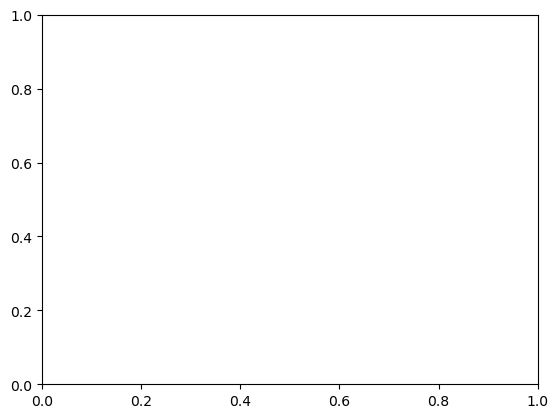

In [25]:
from matplotlib import pyplot as plt
from matplotlib import animation
from tqdm import tqdm
import os
from IPython.display import clear_output

save_path = os.getcwd() + r"/images/E0/"

fig, ax = plt.subplots(1)

E = False

for i in tqdm(range(len(t1))):
    x1 = sin(theta1[i])
    y1 = -cos(theta1[i])
    
    x2 = sin(theta1[i]) + sin(theta2[i])
    y2 = -cos(theta1[i]) - cos(theta2[i])    
    
    #physical animation
    ax.scatter(x1,y1,color = "blue")
    ax.scatter(x2,y2, color = "red")
    
    #plot string
    ax.plot([0,x1],[0,y1],"-",color = "black")
    ax.plot([x1,x2],[y1,y2],"-",color = "black")
    if E:
        ax.plot([0,0],[0,cos(t[i])])
    ax.set_xlim(-2.5,2.5)
    ax.set_ylim(-2.5,2.5)

    plt.savefig(save_path+f"frame {i}")
    ax.clear()

plt.show()    

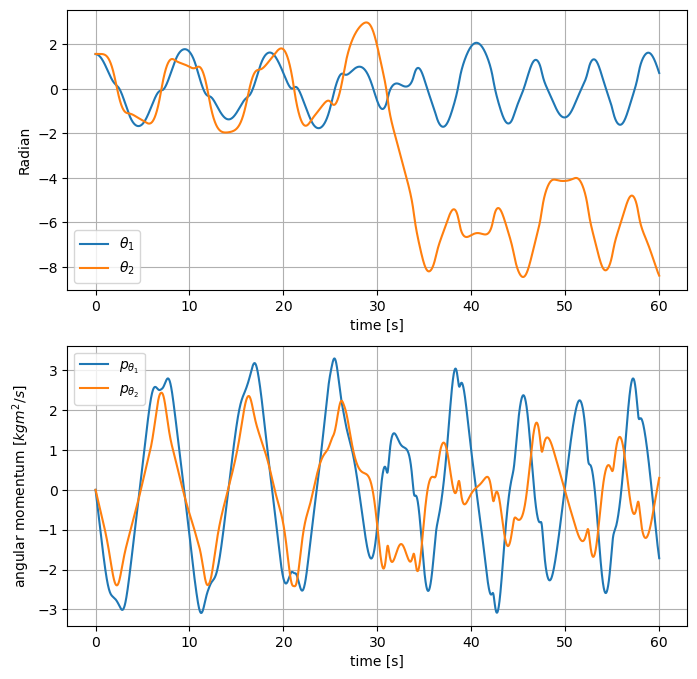

In [15]:
fig, (theta, p) = plt.subplots(2,1, figsize = (8,8))
theta.plot(t1, theta1, label = r"$\theta_1$")
theta.plot(t1, theta2, label = r"$\theta_2$")
theta.set_xlabel("time [s]")
theta.set_ylabel("Radian")
theta.legend()
theta.grid()

p.plot(t1, p_theta1, label = r"$p_{\theta_1}$")
p.plot(t1, p_theta2, label = r"$p_{\theta_2}$")
p.set_xlabel("time [s]")
p.set_ylabel("angular momentum $[kg m^2 / s]$")
p.legend()
p.grid()